## Question: Is there a correlation between GDP and greenhouse gas emissions? (Justin)

Does GDP affect the volume of greenhouse emissions? By determining a correlation between these variables, we can better determine how a country's economy affects its CO2 emissions. We would expect countries with larger economies, and therefore larger GDPs, to produce more CO2 emissions, due to more energy demands and pollution from factories. 

Can we also predict a country's CO2 emissions by their GDP? Or the GDP and the percentage of their country's economy is agriculture? We expect agriculture to impact CO2 emissions as livestock are one of the contributors to CO2 emissions.

In order to answer this question, data from https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles will be utilized. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The dataset was extracted from information published by the United Nations, so it is a good authoritative source. We'll also use the following for more accurate CO2 emissions, https://worldpopulationreview.com/country-rankings/greenhouse-gas-emissions-by-country as the original dataset has quite a few missing data.

Before analyzing the data, it will be helpful to define what units GDP and greenhouse emissions are measured in. GDP will be measured in million USD. CO2 emissions will be quantified in MtCO2e. Million tones of CO2 equivalent.

## Analysis

We'll use numpy, and pandas to analyze the data. We will also use sklearn from scikit to build a linear regression model to be able to predict how a country's GDP affects their CO2 emissions. Finally, matplotlib will be used to graph our findings.

In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

First, we'll preprocess some data. The data contains invalid, non-numeric symbols like `~` and `...` which we'll preprocess before handing the data off the Pandas.

In [614]:
# preprocess data, fixup ~, etc.
# Replace:
#   ~ -> ''
#   ... -> NaN

translation = {'~': '', '...': np.nan}
with open('country_profile_variables.csv', 'r') as f:
    data = f.read()
    data = data.replace('~', '')
    data = data.replace('...', 'NaN')
    data = pd.read_csv(StringIO(data))

Ensure the correct types of data that we care about. GDP, Emissions, and Eceonmy percentages should be all numeric.

In [615]:
data.dtypes

country                                                        object
Region                                                         object
Surface area (km2)                                              int64
Population in thousands (2017)                                  int64
Population density (per km2, 2017)                            float64
Sex ratio (m per 100 f, 2017)                                 float64
GDP: Gross domestic product (million current US$)               int64
GDP growth rate (annual %, const. 2005 prices)                float64
GDP per capita (current US$)                                  float64
Economy: Agriculture (% of GVA)                               float64
Economy: Industry (% of GVA)                                  float64
Economy: Services and other activity (% of GVA)               float64
Employment: Agriculture (% of employed)                       float64
Employment: Industry (% of employed)                          float64
Employment: Services

Preview the data to see what it looks like.

In [616]:
data

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99.0,-99.0,-99.0,...,-99.0,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99.00,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99.00,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99.0,-99.0,-99.0,...,9.0,89,41.6,0.0/1.6,-99,26,-99,-99,-99.00,-99
225,Western Sahara,NorthernAfrica,266000,553,2.1,110.1,-99,-99.0,-99.0,-99.0,...,-99.0,49,2.7,-99,-99,-99,-99,-99,-99.00,-99
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,...,25.1,298,1.0,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,...,21.0,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99


Extract the columns we truly care about and want to analyze. We'll only analyze the GDP and Percent % GVA is Agriculture.

In [617]:
cols = ["country", "Region", "GDP: Gross domestic product (million current US$)", "Economy: Agriculture (% of GVA)"]

# extract the columns we want
data = data[cols]
data

,country,Region,GDP: Gross domestic product (million current US$),Economy: Agriculture (% of GVA)
0,Afghanistan,SouthernAsia,20270,23.3
1,Albania,SouthernEurope,11541,22.4
2,Algeria,NorthernAfrica,164779,12.2
3,American Samoa,Polynesia,-99,-99.0
4,Andorra,SouthernEurope,2812,0.5
...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,-99,-99.0
225,Western Sahara,NorthernAfrica,-99,-99.0
226,Yemen,WesternAsia,29688,14.7
227,Zambia,EasternAfrica,21255,8.2


From the preview of our data, we see multiple values equally -99. This is not valid data, so we'll replace any value close to -99 with NaN to prevent hinderances to our data.

In [618]:
# find data that is close to -99 and replace with NaN
data = data.replace(-99, np.nan)
data.head(5)

,country,Region,GDP: Gross domestic product (million current US$),Economy: Agriculture (% of GVA)
0,Afghanistan,SouthernAsia,20270.0,23.3
1,Albania,SouthernEurope,11541.0,22.4
2,Algeria,NorthernAfrica,164779.0,12.2
3,American Samoa,Polynesia,NaN,NaN
4,Andorra,SouthernEurope,2812.0,0.5


We'll join our dataset with another data set that contains a time series of green house gas emissions. Before that, we need to fixup the name of the countries so that the datasets can be joined. Since our profile data set is from 2017, we'll only join that data.

In [619]:
# load the green house data
ghg = pd.read_csv('ghg-emissions.csv')
ghg = ghg[["Country/Region", "2017"]]

countryMappings = {
    'United States of America': 'United States',
    'Republic of Korea': 'Korea, Rep.',
    'Viet Nam': 'Vietnam',
    'Czechia': 'Czech Republic'
}


# join the the data. Add the 2017 colun to the data dataframe based on the country name
data.country = data.country.map(lambda c: countryMappings[c] if c in countryMappings.keys() else c).map(lambda c: c[:(c.find("(") - 1)] if c.find("(") != -1 else c)

merged = data.merge(ghg, left_on='country', right_on='Country/Region', how='inner')
merged.drop("Country/Region", axis=1, inplace=True)
merged.dropna(inplace=True)
merged


,country,Region,GDP: Gross domestic product (million current US$),Economy: Agriculture (% of GVA),2017
0,Afghanistan,SouthernAsia,20270.0,23.3,97.45
1,Albania,SouthernEurope,11541.0,22.4,10.06
2,Algeria,NorthernAfrica,164779.0,12.2,212.33
3,Andorra,SouthernEurope,2812.0,0.5,0.59
4,Angola,MiddleAfrica,117955.0,6.8,137.32
...,...,...,...,...,...
175,Venezuela,SouthAmerica,344331.0,5.3,286.63
176,Vietnam,South-easternAsia,193241.0,18.9,328.33
177,Yemen,WesternAsia,29688.0,14.7,21.97
178,Zambia,EasternAfrica,21255.0,8.2,93.87


Normalize our data to ensure fair comparisions when graphing.

In [620]:
# normalize data
numeric = merged.iloc[:, 2:]
norm = merged.copy()
norm.iloc[:, 2:] = (numeric - numeric.mean()) / numeric.std()
norm

,country,Region,GDP: Gross domestic product (million current US$),Economy: Agriculture (% of GVA),2017
0,Afghanistan,SouthernAsia,-0.224128,0.893504,-0.146081
1,Albania,SouthernEurope,-0.229384,0.820941,-0.234429
2,Algeria,NorthernAfrica,-0.137105,-0.001441,-0.029941
3,Andorra,SouthernEurope,-0.234641,-0.944762,-0.244003
4,Angola,MiddleAfrica,-0.165302,-0.436820,-0.105774
...,...,...,...,...,...
175,Venezuela,SouthAmerica,-0.028980,-0.557759,0.045174
176,Vietnam,South-easternAsia,-0.119966,0.538751,0.087331
177,Yemen,WesternAsia,-0.218456,0.200123,-0.222389
178,Zambia,EasternAfrica,-0.223534,-0.323944,-0.149700


Sanity check -- Is there a correlation between CO2 emissions and the GDP of a country?

In [621]:
# check correlation
merged["2017"].corr(merged["GDP: Gross domestic product (million current US$)"])

0.820233898332974

Yes! Our `R = 0.82` which means we have a decently strong correlation between the two. Lets try to compute a linear regression and see if we can somewhat predict a countries CO2 emissions based off their GDP and the percent of their economy that is based off agriculture.

We'll import the necessary sklearn libraries.

In [622]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

For our first linear regression, lets see the $r^2$ of predicting CO2 with two variables: GDP and the percent of economy that is based off agriculture.

In [623]:
x = merged[["GDP: Gross domestic product (million current US$)", "Economy: Agriculture (% of GVA)"]]
y = merged["2017"]

We'll split our data 80/20 to see if the linear model actually fits.

In [624]:
# compute linear regression 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr_m = LinearRegression()
lr_m.fit(x_train, y_train) 

predictions = lr_m.predict(x_test)
r2_score(y_test, predictions)


0.5229318380368199

Here, $r^2 = 0.523$ which is a somewhat decent predictor, but not very reliable.

Next, lets see how GDP alone can predict CO2 emissions.

In [625]:
x = merged[["GDP: Gross domestic product (million current US$)"]]
y = merged["2017"]

Again, we'll split our data 80/20.

In [626]:
# compute linear regression 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr_s = LinearRegression()
lr_s.fit(x_train, y_train) 

predictions = lr_s.predict(x_test)
r2_score(y_test, predictions)


0.5215048830294262

Interestingly, there is not much of a difference with or without the second variable as, $r^2 = 0.522$.

Lets plot our Data with the linear regression to see the final result!

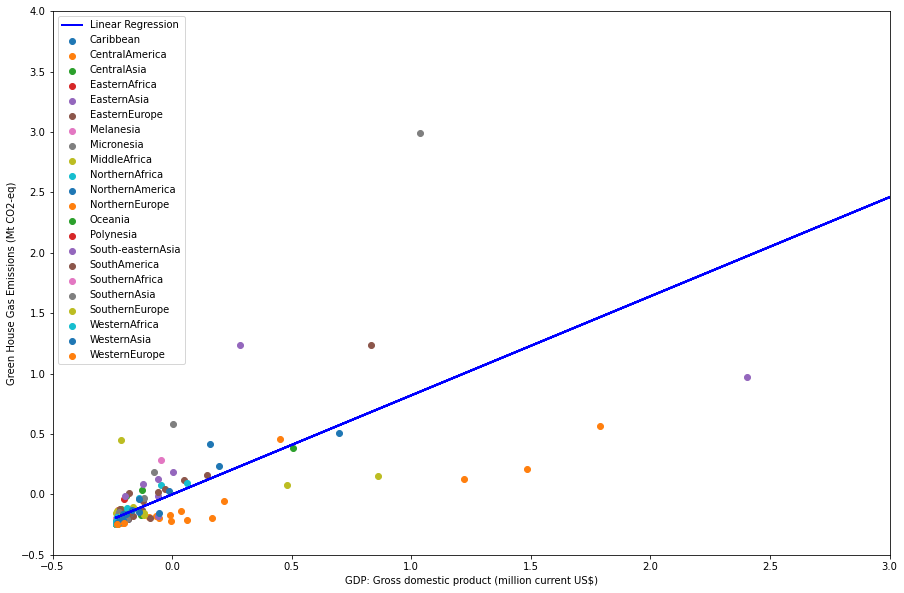

In [633]:

# plot each region a different color in viridis
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_xlabel('GDP: Gross domestic product (million current US$)')
ax.set_ylabel('Green House Gas Emissions (Mt CO2-eq)')
ax.set_xlim([-0.5, 3])
ax.set_ylim([-0.5, 4])

for name, values in norm.groupby('Region'):
    ax.scatter(values["GDP: Gross domestic product (million current US$)"], values["2017"], label=name)

# Compute linear regression and plot the line
x = norm[["GDP: Gross domestic product (million current US$)"]]
y = norm["2017"]
lr = LinearRegression()
lr.fit(x, y)

ax.plot(x, lr.predict(x), color='blue', linewidth=2, label='Linear Regression')

ax.legend()
plt.show()

Awesome! We clearly see a *weak* linear trend between the two variables. Lets dig deeper into our previously computed linear regression model and understand the effects of a countries increasing GDP on their CO2 emissions.

In [640]:
# extract the coeffecients from the lr_s model.
ton_co2_per_gdp = lr_s.coef_[0] * 1e6
base_co2_emiss = lr_s.intercept_

# round the variables to the nearest whole number
ton_co2_per_gdp = round(ton_co2_per_gdp, 0)
base_co2_emiss = round(base_co2_emiss, 0)

ton_co2_per_gdp, base_co2_emiss

(326.0, 89.0)

From our analysis, we found that for every `$1,000,000` increase in a countries GDP, approximately `326` more tons of CO2 will be released by that country.

## Conclusion:

We found a strong correlation ($r^2 \approx 0.8$) between a country's Gross Domestic Product and that countries emissions of CO2. Based on our construction and validation of a linear regression model, we found that every million dollar increase in a country's Gross Domestic Product yields an increase of CO2 emissions of that country by $326\hspace{2pt}\text{tons}$.

These findings suggest that the economic export activity of a country causes CO2 emissions, as those exports require the emission of CO2 to produce that country's products. 

We also found that the percentage of the economy that is based an agriculture, an assumed major component in CO2 emissions, is not effective in predicting CO2 emissions.